# Online Retail Sales Prediction Modeling

## Timeseries Models
- Total Order Counts
- Total Revenue
- StockCode Models

## Product Recommendation Models
- Add to Cart Suggestions
- Next Order Suggestions

## Classification Models
- Propensity to Cancel
- Propensity to Order Again (in the next 30 days)


### Setup Libraries and Load in Data

In [7]:
import os
os.listdir("data/daily_history/")

['orders_2011-02-20.csv',
 'orders_2011-02-21.csv',
 'orders_2011-02-22.csv',
 'orders_2011-02-23.csv',
 'orders_2011-02-24.csv',
 'orders_2011-02-25.csv',
 'orders_2011-02-27.csv',
 'orders_2011-02-28.csv',
 'orders_2011-03-01.csv',
 'orders_2011-03-02.csv',
 'orders_2011-03-03.csv',
 'orders_2011-03-04.csv',
 'orders_2011-03-06.csv',
 'orders_2011-03-07.csv',
 'orders_2011-03-08.csv',
 'orders_2011-03-09.csv',
 'orders_2011-03-10.csv',
 'orders_2011-03-11.csv',
 'orders_2011-03-13.csv',
 'orders_2011-03-14.csv',
 'orders_2011-03-15.csv',
 'orders_2011-03-16.csv',
 'orders_2011-03-17.csv',
 'orders_2011-03-18.csv',
 'orders_2011-03-20.csv',
 'orders_2011-03-21.csv',
 'orders_2011-03-22.csv',
 'orders_2011-03-23.csv',
 'orders_2011-03-24.csv',
 'orders_2011-03-25.csv',
 'orders_2011-03-27.csv',
 'orders_2011-03-28.csv',
 'orders_2011-03-29.csv',
 'orders_2011-03-30.csv',
 'orders_2011-03-31.csv',
 'orders_2011-04-01.csv',
 'orders_2011-04-03.csv',
 'orders_2011-04-04.csv',
 'orders_201

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mlflow

In [2]:
country_mapping_df = pd.read_csv("data/Country Mapping.csv")
region_mapping_df = pd.read_csv("data/region_mapping.csv")
retail_sales_df = pd.read_csv("data/daily_history/orders_2011-02-20.csv")
# Add New Features
retail_sales_df["Cost"] = retail_sales_df["UnitPrice"]*retail_sales_df["Quantity"]
retail_sales_df['alpha-3'] = pd.merge(retail_sales_df,country_mapping_df,how='left',left_on='Country',right_on='country_name').drop(['country_name'],axis=1)['alpha-3']
retail_sales_df = pd.merge(retail_sales_df,region_mapping_df,how='left',on='alpha-3')

In [3]:
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateTime,Cost,...,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,15.30,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,20.34,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,22.00,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,20.34,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,20.34,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95913,544467,22784,LANTERN CREAM GAZEBO,1,2011-02-20,4.95,14502.0,United Kingdom,2011-02-20,4.95,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
95914,544467,22427,ENAMEL FLOWER JUG CREAM,1,2011-02-20,5.95,14502.0,United Kingdom,2011-02-20,5.95,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
95915,544467,22799,SWEETHEART WIRE FRUIT BOWL,1,2011-02-20,8.50,14502.0,United Kingdom,2011-02-20,8.50,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN
95916,544467,22776,SWEETHEART CAKESTAND 3 TIER,1,2011-02-20,9.95,14502.0,United Kingdom,2011-02-20,9.95,...,United Kingdom,GB,826.0,ISO 3166-2:GB,Europe,Northern Europe,NaN,150.0,154.0,NaN


In [4]:
#TODO Clean up cancelled orders 
total_invoice_predictions = retail_sales_df[["InvoiceNo","InvoiceDate"]].drop_duplicates()
total_invoice_predictions["InvoiceDate"] = pd.to_datetime(total_invoice_predictions["InvoiceDate"])
total_invoice_predictions

,InvoiceNo,InvoiceDate
0,536365,2010-12-01
7,536366,2010-12-01
9,536367,2010-12-01
21,536368,2010-12-01
25,536369,2010-12-01
...,...,...
95672,544463,2011-02-20
95764,544464,2011-02-20
95796,544465,2011-02-20
95821,544466,2011-02-20


In [5]:
total_invoice_predictions_by_day = total_invoice_predictions.groupby(pd.Grouper(key='InvoiceDate', axis=0,  freq='D')).count().reset_index().rename(columns={"InvoiceNo":"Count"})
total_invoice_predictions_by_day

,InvoiceDate,Count
0,2010-12-01,143
1,2010-12-02,167
2,2010-12-03,108
3,2010-12-04,0
4,2010-12-05,95
...,...,...
77,2011-02-16,69
78,2011-02-17,73
79,2011-02-18,67
80,2011-02-19,0


In [6]:
# Set aside the last 36 days as a validation series
from darts import TimeSeries

series = TimeSeries.from_dataframe(total_invoice_predictions_by_day, "InvoiceDate", "Count")
train, val = series[:-36], series[-36:]


In [52]:
def create_mlflow_train_and_val_dataset(train,val):
    # output darts Timeseries to csv
    train.to_csv("data/total_invoice_predictions_by_day_train.csv")
    val.to_csv("data/total_invoice_predictions_by_day_val.csv")
    # Read csv to pandas df
    train_df = pd.read_csv("data/total_invoice_predictions_by_day_train.csv")
    val_df = pd.read_csv("data/total_invoice_predictions_by_day_val.csv")
    # Create an instance of a PandasDataset
    dataset_train = mlflow.data.from_pandas(
        train_df, name="Total Invoice Predictions by Day", targets="Count"
    )
    dataset_val = mlflow.data.from_pandas(
        val_df, name="Total Invoice Predictions by Day", targets="Count"
    )
    return dataset_train, dataset_val

from darts.metrics import *

def train_and_log_model(model,exp_name,series,train,val):
    mlflow.set_experiment(exp_name)
    experiment = mlflow.get_experiment_by_name(exp_name)
    mlflow.autolog()
    
    with mlflow.start_run(experiment_id=experiment.experiment_id):
        # Log Train and Val Datasets
        dataset_train, dataset_val = create_mlflow_train_and_val_dataset(train,val)
        mlflow.log_input(dataset_train, context="training")
        mlflow.log_input(dataset_val, context="validation")

        # Train Model
        model.fit(train)
        # Predict with Model
        forecast = model.predict(len(val))
        
        # Calculate and Log Performance Metrics
        mlflow.log_metric(key="val_mae",  value=mae(val, forecast))
        mlflow.log_metric(key="val_marre", value=marre(val, forecast))
        mlflow.log_metric(key="val_merr", value=merr(val, forecast))
        mlflow.log_metric(key="val_mse", value=mse(val, forecast))
        mlflow.log_metric(key="val_r2_score", value=r2_score(val, forecast))

        # Make and Log figure 
        fig = plt.figure(figsize=(10, 6))
        series.plot(label="actual")
        forecast.plot(label="forecast")
        plt.title(exp_name)
        mlflow.log_figure(fig, 'darts_fig.png')
        

2024/10/04 18:01:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/10/04 18:01:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/10/04 18:01:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/10/04 18:01:02 WARNING mlflow.utils.autologging_utils: MLflow pytorch autologging is known to be compatible with 1.9.0 <= torch <= 2.4.0, but the installed version is 2.4.1+cu121. If you encounter errors during autologging, try upgrading / downgrading torch to a compatible version, or try upgrading MLflow.
2024/10/04 18:01:02 INFO mlflow.tracking.fluent: Autologging successfully enabled for pytorch_lightning.
2024/10/04 18:01:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/04 18:01:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
20

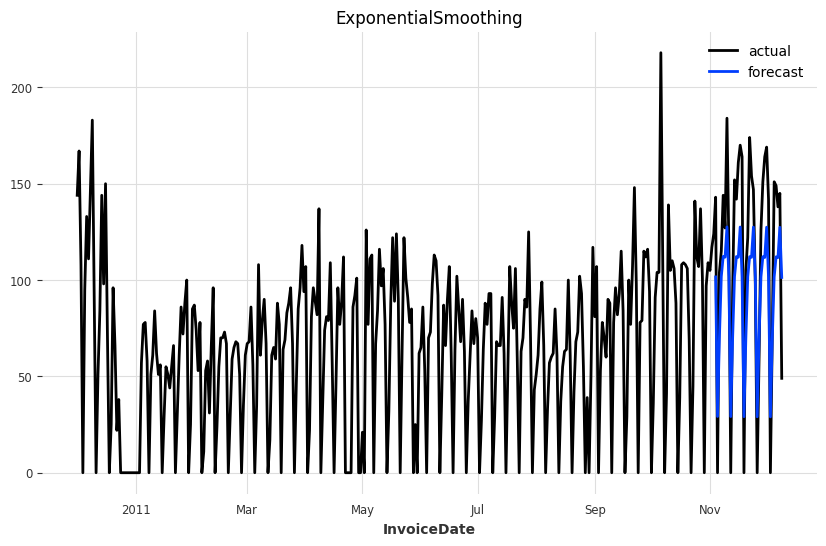

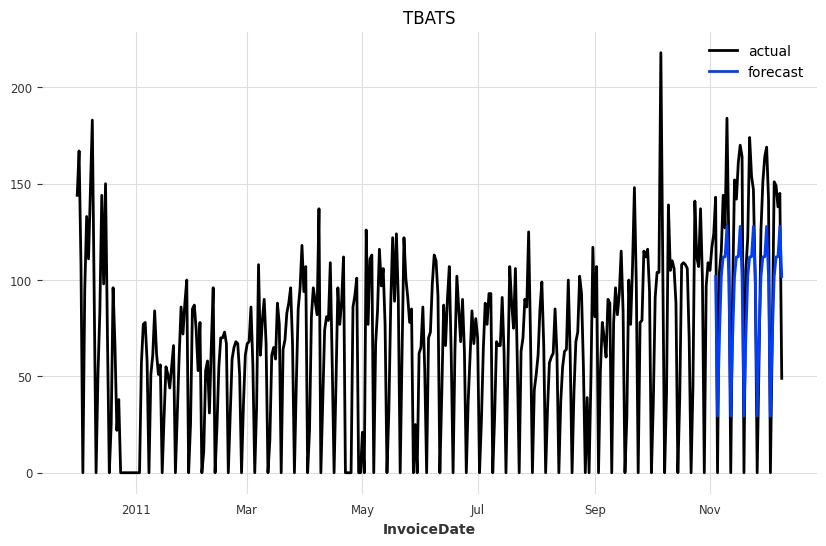

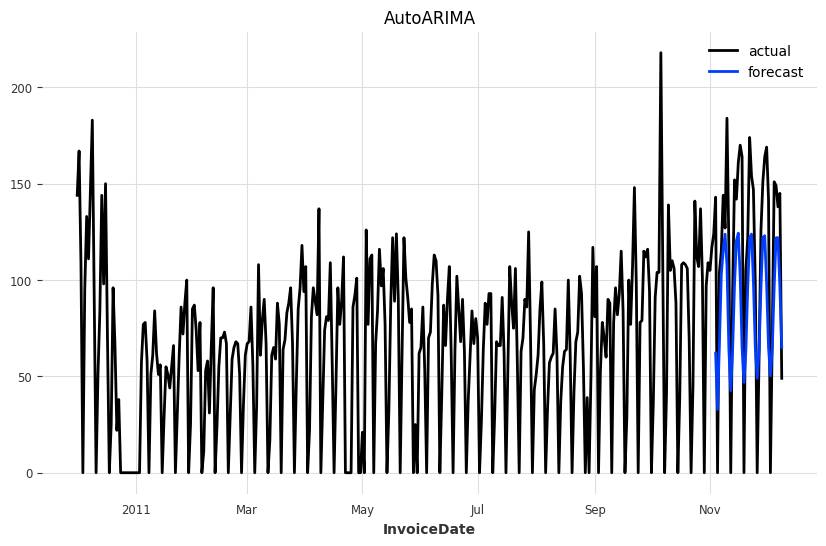

In [53]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta
train_and_log_model(ExponentialSmoothing(),"ExponentialSmoothing",series,train,val)
train_and_log_model(TBATS(),"TBATS",series,train,val)
train_and_log_model(AutoARIMA(),"AutoARIMA",series,train,val)

### Deep Learning Model

2024/10/04 18:12:46 WARNING mlflow.utils.autologging_utils: MLflow pytorch autologging is known to be compatible with 1.9.0 <= torch <= 2.4.0, but the installed version is 2.4.1+cu121. If you encounter errors during autologging, try upgrading / downgrading torch to a compatible version, or try upgrading MLflow.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.1 M  | train
-------------------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6

Epoch 9: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s, train_loss=0.0129]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s, train_loss=0.0129]


2024/10/04 18:13:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


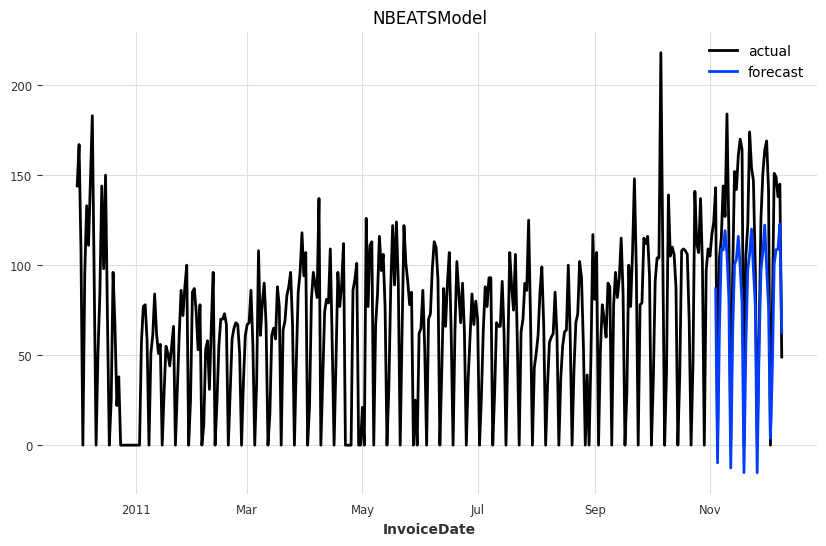

In [58]:
from darts.models import NBEATSModel

from darts.dataprocessing.transformers import Scaler
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
exp_name = "NBEATSModel"
mlflow.set_experiment(exp_name)
experiment = mlflow.get_experiment_by_name(exp_name)
mlflow.pytorch.autolog(checkpoint_monitor="train_loss")

model = NBEATSModel(input_chunk_length=14, output_chunk_length=7, random_state=42)

with mlflow.start_run(experiment_id=experiment.experiment_id):
    # Log Train and Val Datasets
    dataset_train, dataset_val = create_mlflow_train_and_val_dataset(train,val)
    mlflow.log_input(dataset_train, context="training")
    mlflow.log_input(dataset_val, context="validation")
    # Train Model
    model.fit(train_scaled, epochs=10, verbose=True)
    # Predict with Model
    preds = model.predict(series=train_scaled, n=len(val))
    # scale back:
    forecast = scaler.inverse_transform(preds)
    
    # Calculate and Log Performance Metrics
    mlflow.log_metric(key="val_mae",  value=mae(val, forecast))
    mlflow.log_metric(key="val_marre", value=marre(val, forecast))
    mlflow.log_metric(key="val_merr", value=merr(val, forecast))
    mlflow.log_metric(key="val_mse", value=mse(val, forecast))
    mlflow.log_metric(key="val_r2_score", value=r2_score(val, forecast))
    
    # Make and Log figure 
    fig = plt.figure(figsize=(10, 6))
    series.plot(label="actual")
    forecast.plot(label="forecast")
    plt.title(exp_name)
    mlflow.log_figure(fig, 'darts_fig.png')
    


2024/10/04 18:09:46 INFO mlflow.tracking.fluent: Experiment with name 'ProphetModel' does not exist. Creating a new experiment.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9eion59/v0abk0go.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx9eion59/c3ttrhry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/opt/conda/envs/aistudio/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71860', 'data', 'file=/tmp/tmpx9eion59/v0abk0go.json', 'init=/tmp/tmpx9eion59/c3ttrhry.json', 'output', 'file=/tmp/tmpx9eion59/prophet_modelyu2jz6w4/prophet_model-20241004180951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:09:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start proces

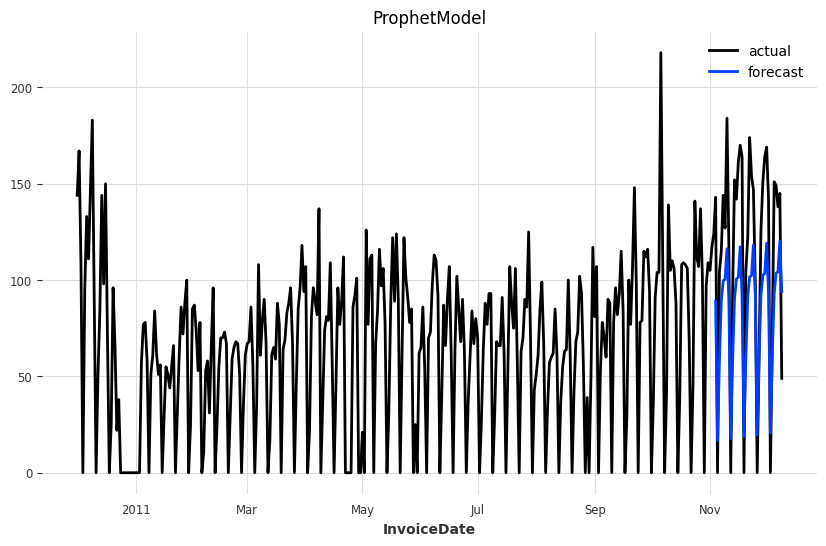

In [57]:
from darts.models import Prophet
from darts.utils.timeseries_generation import datetime_attribute_timeseries



exp_name = "ProphetModel"
mlflow.set_experiment(exp_name)
experiment = mlflow.get_experiment_by_name(exp_name)

model = Prophet()
#    add_seasonalities={
#        'name':"weekly_seasonality",
#        'seasonal_periods':52,
#        'fourier_order':5
#        },
#

with mlflow.start_run(experiment_id=experiment.experiment_id):
    # Log Train and Val Datasets
    dataset_train, dataset_val = create_mlflow_train_and_val_dataset(train,val)
    mlflow.log_input(dataset_train, context="training")
    mlflow.log_input(dataset_val, context="validation")
    # Train Model
    model.fit(train)
    # Log model parameters
    mlflow.log_params(model.model_params)
    # Log the Prophet model as an artifact
    model.save("prophet_model.pkl")
    mlflow.log_artifact("prophet_model.pkl")
    # Predict with Model
    forecast = model.predict(len(val))
    
    # Calculate and Log Performance Metrics
    mlflow.log_metric(key="val_mae",  value=mae(val, forecast))
    mlflow.log_metric(key="val_marre", value=marre(val, forecast))
    mlflow.log_metric(key="val_merr", value=merr(val, forecast))
    mlflow.log_metric(key="val_mse", value=mse(val, forecast))
    mlflow.log_metric(key="val_r2_score", value=r2_score(val, forecast))
    
    # Make and Log figure 
    fig = plt.figure(figsize=(10, 6))
    series.plot(label="actual")
    forecast.plot(label="forecast")
    plt.title(exp_name)
    mlflow.log_figure(fig, 'darts_fig.png')    